In [1]:
# Thamys Abrahao - 06/2018
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

In [2]:
pd.set_option('display.max_columns', 50)

# Abrindo o arquivo montado com as informações dos usuários 

In [3]:
df = pd.read_csv('base_analise_PasseiDireto.csv')

In [4]:
df.shape

(60000, 34)

In [5]:
df.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,Qnt_QuestionSnippet,NumberofSessions,Pagantes,Churn,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Qnt_fileviews,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
0,NaN,administracao,12970655,2012-05-29 15:22:27.490000,email,rio de janeiro,NaN,puc-rio,6.0,109,1.0,NaN,5.0,NaN,6.0,45.0,0.0,8.0,0.0,0.0,0.0,0.0,29.0,1.0,15.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,5.0,55.0
1,rio de janeiro,direito do trabalho e seguranca social,59873654,2012-09-03 20:32:04.853000,facebook,rio de janeiro,NaN,uff,NaN,21,NaN,NaN,NaN,NaN,5.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,enfermagem,3664695,2012-09-10 20:26:30.253000,facebook,distrito federal,NaN,unb,NaN,8,NaN,NaN,NaN,NaN,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,resende,engenharia de producao mecanica,15207697,2012-09-05 15:31:08.090000,facebook,rio de janeiro,NaN,uerj,NaN,4,NaN,NaN,NaN,NaN,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,engenharia eletrica,36988693,2012-10-15 21:34:51.143000,facebook,NaN,NaN,ufu,NaN,39,NaN,NaN,NaN,NaN,5.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.loc[:,'Pagantes'] = df['Pagantes'].replace(np.nan, 0)
df.loc[:,'Churn'] = df['Churn'].replace(np.nan, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 34 columns):
City                       19830 non-null object
CourseName                 60000 non-null object
StudentId                  60000 non-null int64
RegisteredDate             60000 non-null object
SignupSource               60000 non-null object
State                      24239 non-null object
StudentClient              51581 non-null object
UniversityName             60000 non-null object
Qnt_QuestionSnippet        2240 non-null float64
NumberofSessions           60000 non-null int64
Pagantes                   60000 non-null float64
Churn                      60000 non-null float64
AnswerSnippet              3068 non-null float64
Qnt_textBookSolutions      5790 non-null float64
Qnt_subjects               57229 non-null float64
Qnt_fileviews              56164 non-null float64
Answer_Dislike             14402 non-null float64
Answer_Like                14402 non-null float64
BookS

In [7]:
Premium = df[df.Pagantes == 1]
notPremium = df[df.Pagantes != 1]
Churn = df[df.Churn == 1]

In [8]:
notPremium.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58017 entries, 1 to 59999
Data columns (total 34 columns):
City                       18902 non-null object
CourseName                 58017 non-null object
StudentId                  58017 non-null int64
RegisteredDate             58017 non-null object
SignupSource               58017 non-null object
State                      22824 non-null object
StudentClient              50035 non-null object
UniversityName             58017 non-null object
Qnt_QuestionSnippet        2057 non-null float64
NumberofSessions           58017 non-null int64
Pagantes                   58017 non-null float64
Churn                      58017 non-null float64
AnswerSnippet              2838 non-null float64
Qnt_textBookSolutions      5191 non-null float64
Qnt_subjects               55321 non-null float64
Qnt_fileviews              54184 non-null float64
Answer_Dislike             13487 non-null float64
Answer_Like                13487 non-null float64
BookS

In [9]:
Premium.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 59720
Data columns (total 34 columns):
City                       928 non-null object
CourseName                 1983 non-null object
StudentId                  1983 non-null int64
RegisteredDate             1983 non-null object
SignupSource               1983 non-null object
State                      1415 non-null object
StudentClient              1546 non-null object
UniversityName             1983 non-null object
Qnt_QuestionSnippet        183 non-null float64
NumberofSessions           1983 non-null int64
Pagantes                   1983 non-null float64
Churn                      1983 non-null float64
AnswerSnippet              230 non-null float64
Qnt_textBookSolutions      599 non-null float64
Qnt_subjects               1908 non-null float64
Qnt_fileviews              1980 non-null float64
Answer_Dislike             915 non-null float64
Answer_Like                915 non-null float64
BookSolution_Dislike       

# Quantidade de assinantes

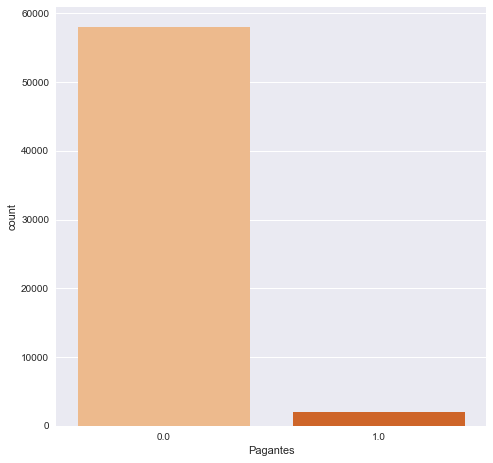

In [10]:
sns.countplot(x='Pagantes', data=df, palette='Oranges')
plt.savefig('pagantes.png', dpi=100);

# Comportamento dos usuários Premium e não Premium

In [11]:
mean = df.groupby('Pagantes').mean().reset_index()
mean.drop('StudentId', axis=1, inplace=True)
mean.head()

,Pagantes,Qnt_QuestionSnippet,NumberofSessions,Churn,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Qnt_fileviews,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
0,0.0,1.707827,21.531930,0.000724,2.447498,1.809671,5.435404,46.170585,0.019278,0.232372,0.000074,0.006080,0.002595,0.000816,0.662342,0.196115,5.055832,0.000890,0.021280,0.028101,0.337288,0.0,0.001335,0.061541,0.246608,6.379328
1,1.0,2.147541,75.564297,0.366112,2.504348,6.168614,7.900419,254.207576,0.013115,0.320219,0.002186,0.057923,0.004372,0.001093,1.417486,0.323497,6.978142,0.022951,0.354098,0.032787,0.384699,0.0,0.003279,0.044809,0.398907,9.561749


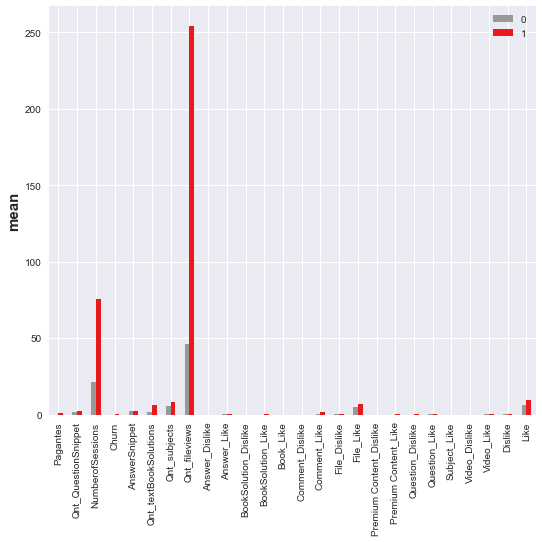

In [12]:
mean.T.plot(kind='bar', colormap='Set1_r')
plt.xlabel('', fontweight='bold', fontsize=15) 
plt.ylabel('mean', fontweight='bold', fontsize=15);
plt.tight_layout()
plt.savefig('mean_premium_not_premium.png', dpi=100)

In [13]:
mean2 = df.groupby('Pagantes').mean().reset_index()
mean2.drop('StudentId', axis=1, inplace=True)
mean2.drop('Qnt_fileviews', axis=1, inplace=True)
mean2.head()

,Pagantes,Qnt_QuestionSnippet,NumberofSessions,Churn,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
0,0.0,1.707827,21.531930,0.000724,2.447498,1.809671,5.435404,0.019278,0.232372,0.000074,0.006080,0.002595,0.000816,0.662342,0.196115,5.055832,0.000890,0.021280,0.028101,0.337288,0.0,0.001335,0.061541,0.246608,6.379328
1,1.0,2.147541,75.564297,0.366112,2.504348,6.168614,7.900419,0.013115,0.320219,0.002186,0.057923,0.004372,0.001093,1.417486,0.323497,6.978142,0.022951,0.354098,0.032787,0.384699,0.0,0.003279,0.044809,0.398907,9.561749


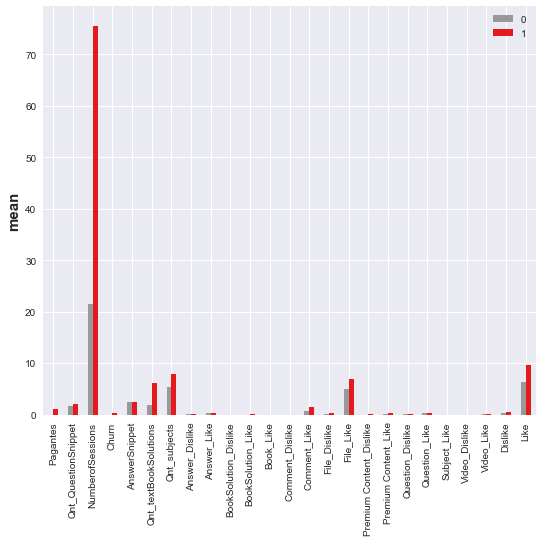

In [14]:
mean2.T.plot(kind='bar', colormap='Set1_r')
plt.xlabel('', fontweight='bold', fontsize=15)
plt.ylabel('mean', fontweight='bold', fontsize=15);
plt.tight_layout()
plt.savefig('mean_premium_not_premium2.png', dpi=100)

# Universidades mais representativas na base premium

In [15]:
top_uni = df.groupby(['Pagantes', 'UniversityName'])['StudentId'].count().reset_index()
top_uni.columns = ['Premium', 'UniversityName', 'Students']
top_uni = (top_uni.set_index(['UniversityName', 'Premium'])['Students']
           .unstack().reset_index().rename_axis(None, 1))
top_uni.columns = ['UniversityName','notPremium', 'Premium']
top_uni.sort_values(by='Premium', ascending=False, inplace=True)

print(top_uni.head())
#print(top_uni['Premium'].sum())
top_uni['total'] = top_uni['notPremium']+ top_uni['Premium']

top_uni['notPremium'] = (top_uni['notPremium']/top_uni['total'])*100
top_uni['Premium'] = (top_uni['Premium']/top_uni['total'])*100

top_uni = top_uni[['UniversityName', 'notPremium', 'Premium']]
top_uni = top_uni.head()

     UniversityName  notPremium  Premium
177         estacio      8231.0    688.0
178     estacio ead      1271.0    175.0
1517        uninter      1616.0    164.0
1519           unip      4246.0    146.0
1594         unopar      1758.0     26.0


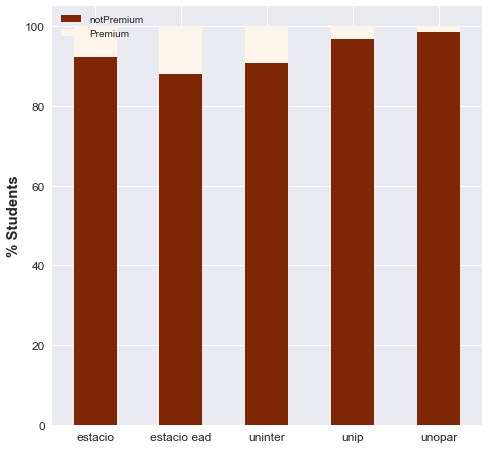

In [16]:
fig_top_uni_premium = top_uni.set_index('UniversityName').plot(kind='bar', stacked=True, colormap='Oranges_r')

for tick in fig_top_uni_premium.get_xticklabels():
    tick.set_rotation(0)

fig_top_uni_premium.xaxis.set_tick_params(labelsize=12)    
fig_top_uni_premium.yaxis.set_tick_params(labelsize=12)    

plt.xlabel('', fontweight='bold', fontsize=15)  # Maybe add plan and type
plt.ylabel('% Students', fontweight='bold', fontsize=15);
fig_top_uni_premium.figure.savefig('fig_top_uni_premium.png', dpi=100)

# Universidades mais representativas na base não premium

In [17]:
not_top_uni = df.groupby(['Pagantes', 'UniversityName'])['StudentId'].count().reset_index()
not_top_uni.columns = ['Premium', 'UniversityName', 'Students']
not_top_uni = (not_top_uni.set_index(['UniversityName', 'Premium'])['Students']
           .unstack().reset_index().rename_axis(None, 1))
not_top_uni.columns = ['UniversityName','notPremium', 'Premium']
not_top_uni.sort_values(by='notPremium', ascending=False, inplace=True)

print(not_top_uni.head())
#print(not_top_uni['Premium'].sum())
not_top_uni['total'] = not_top_uni['notPremium']+ not_top_uni['Premium']

not_top_uni['notPremium'] = (not_top_uni['notPremium']/not_top_uni['total'])*100
not_top_uni['Premium'] = (not_top_uni['Premium']/not_top_uni['total'])*100

not_top_uni = not_top_uni[['UniversityName', 'notPremium', 'Premium']]
not_top_uni = not_top_uni.head()

     UniversityName  notPremium  Premium
177         estacio      8231.0    688.0
1519           unip      4246.0    146.0
1594         unopar      1758.0     26.0
1517        uninter      1616.0    164.0
178     estacio ead      1271.0    175.0


# Olhando as correlações

In [18]:
df_premium_num = Premium.select_dtypes(include = ['float64', 'int64'])
df_notpremium_num = notPremium.select_dtypes(include = ['float64', 'int64'])

# Usuários premium

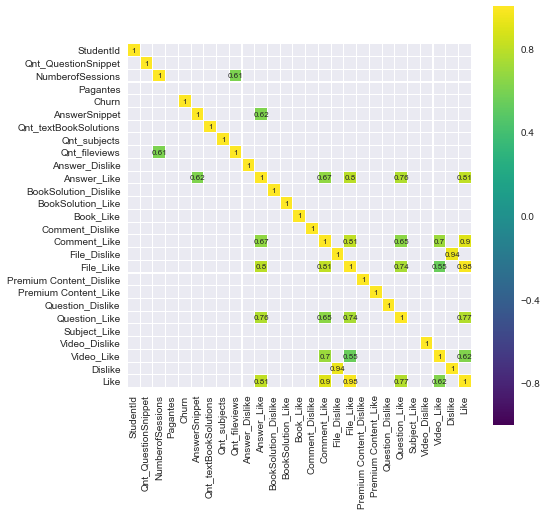

In [19]:
corr = df_premium_num.corr()

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Usuários não premium

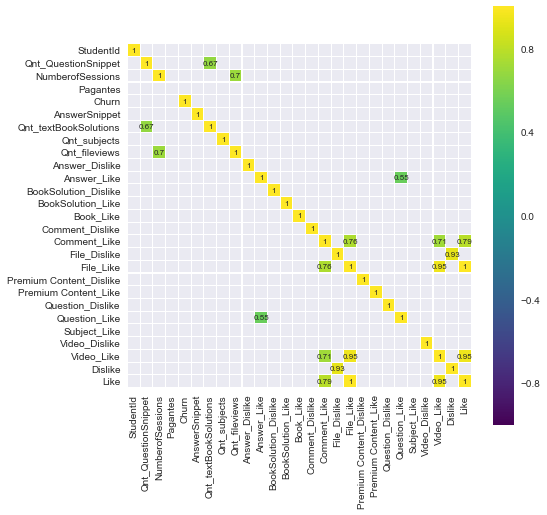

In [20]:
corr3 = df_notpremium_num.corr()

sns.heatmap(corr3[(corr3 >= 0.5) | (corr3 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Histogramas

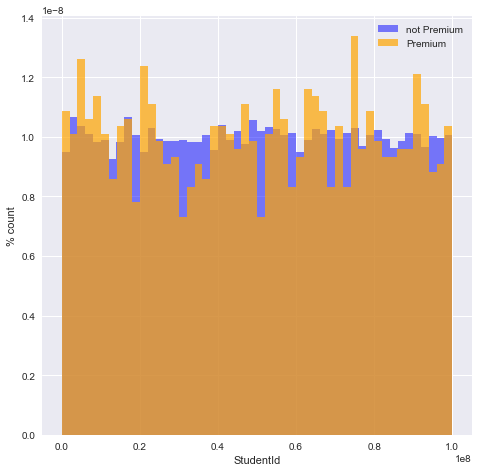

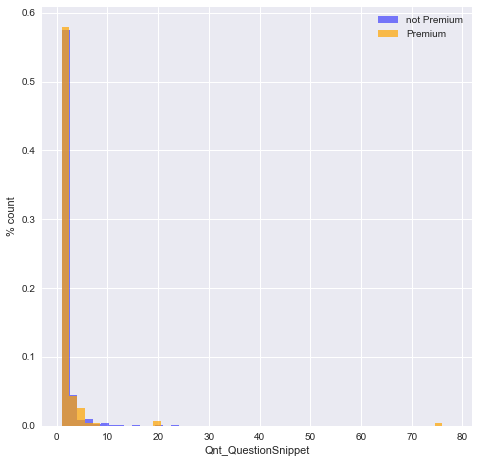

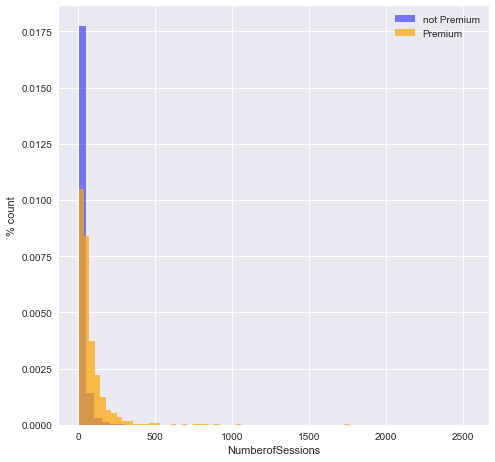

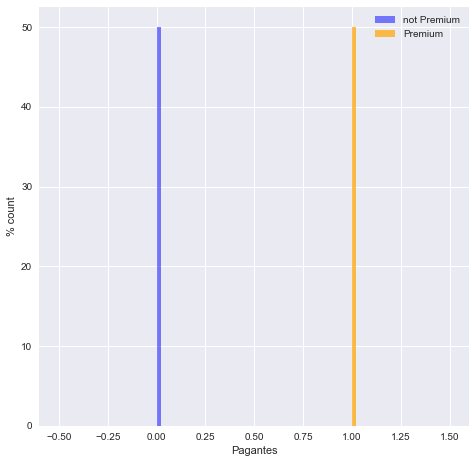

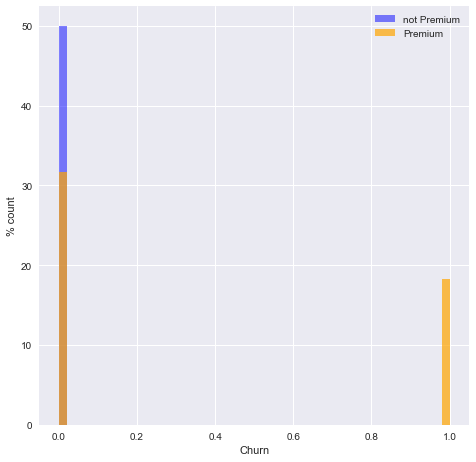

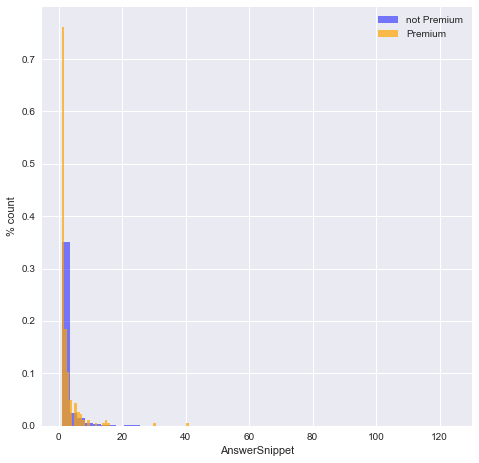

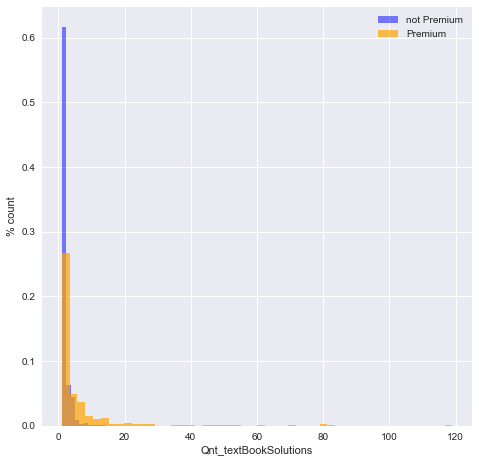

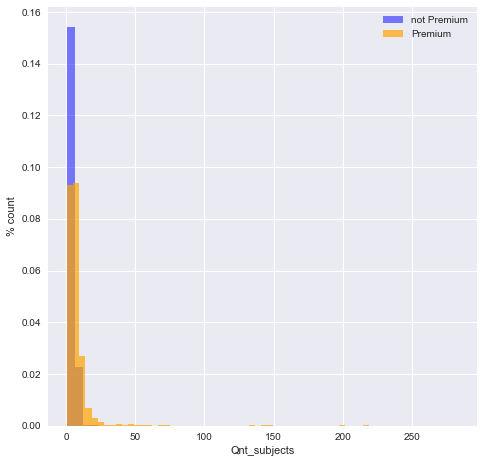

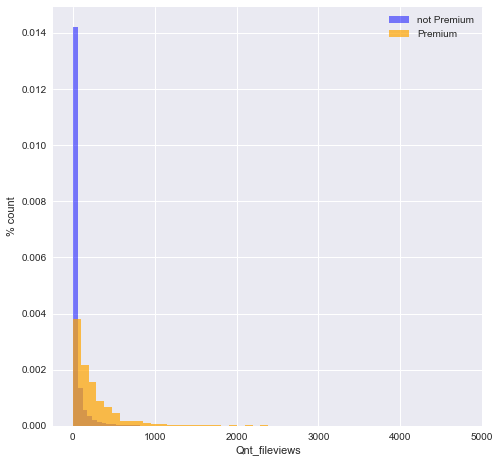

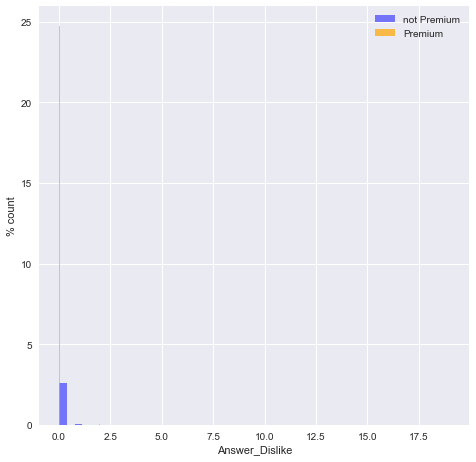

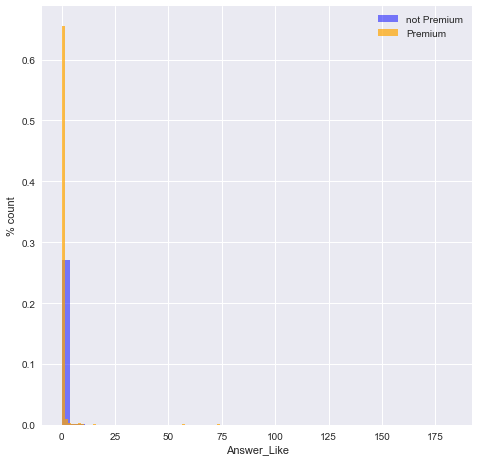

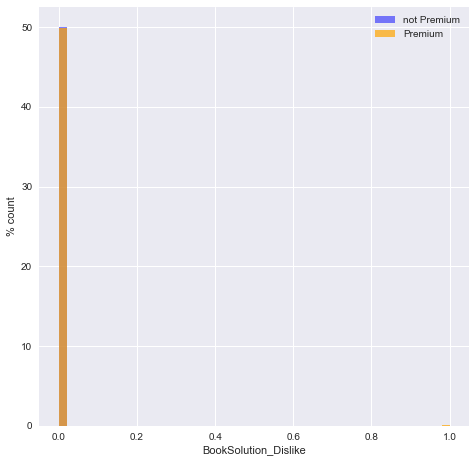

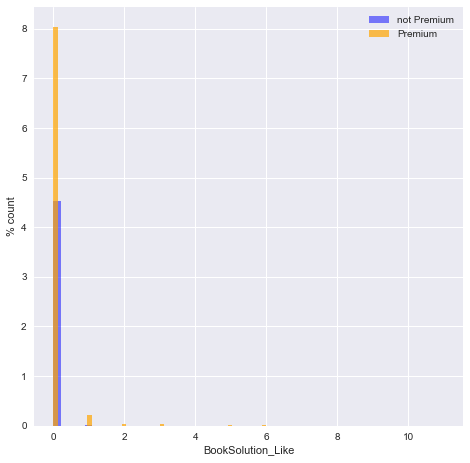

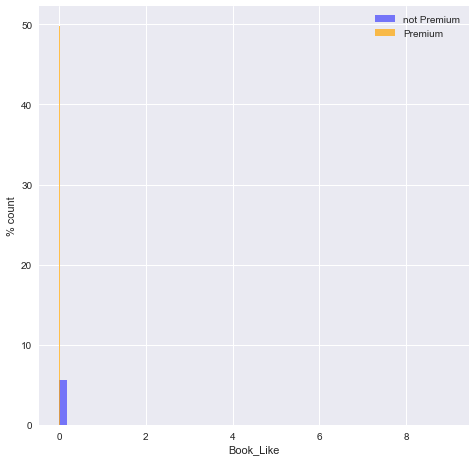

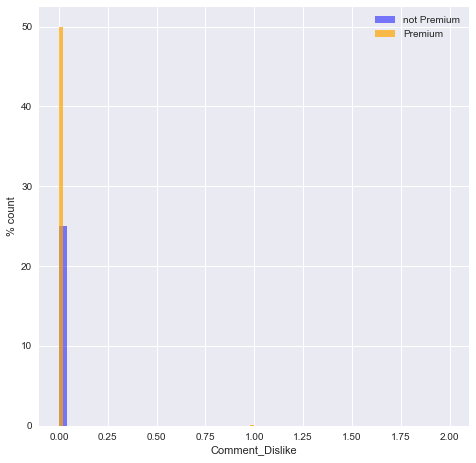

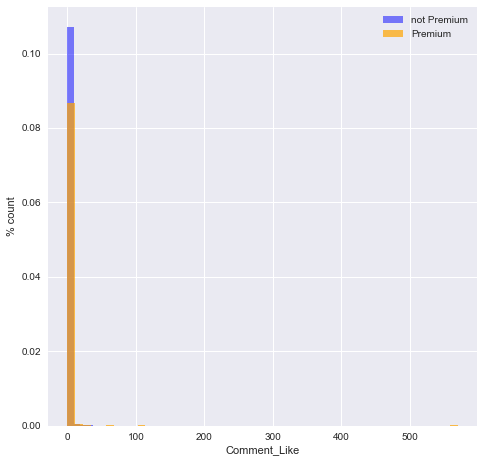

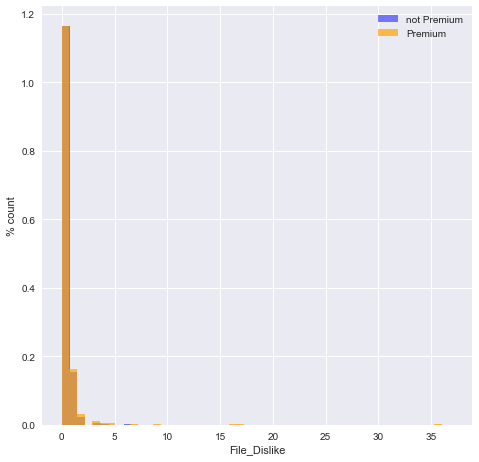

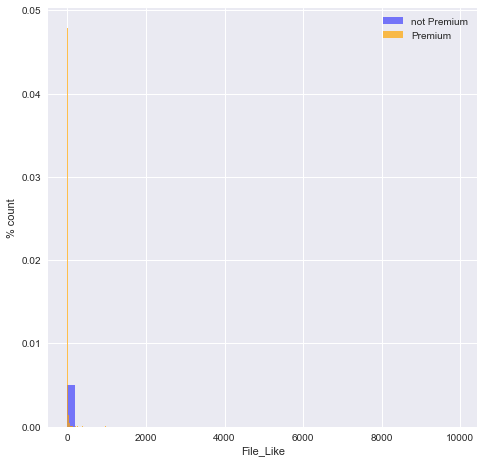

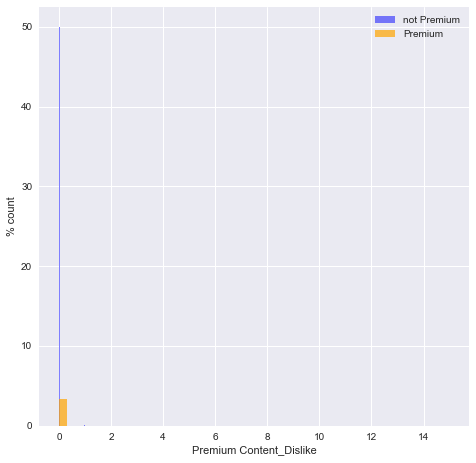

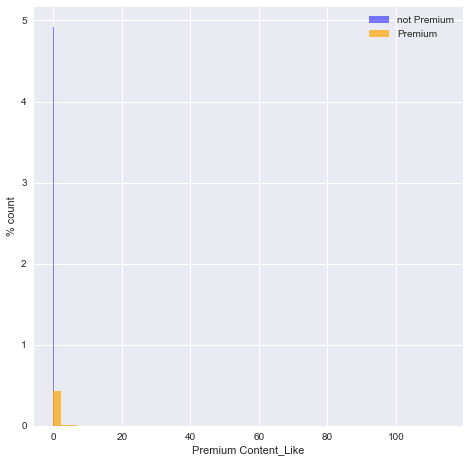

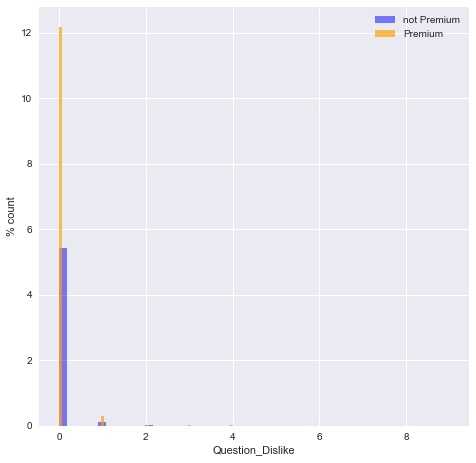

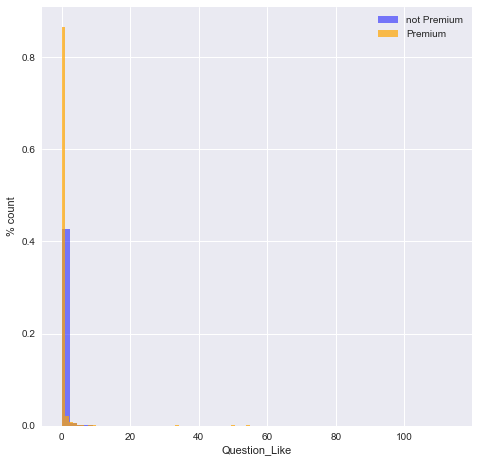

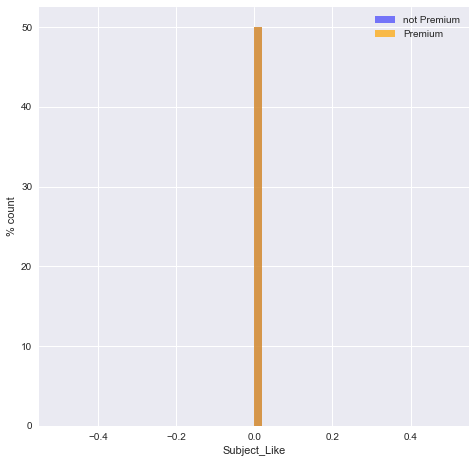

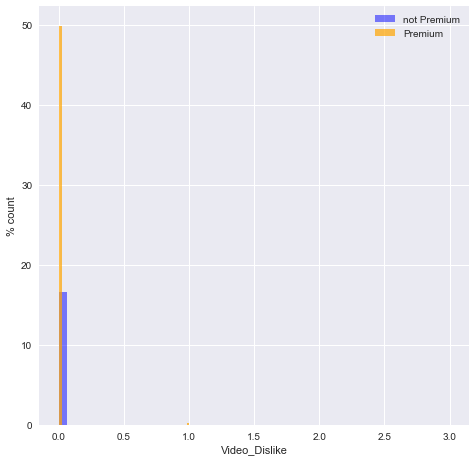

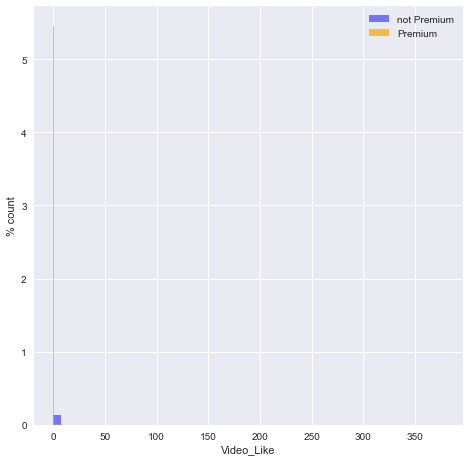

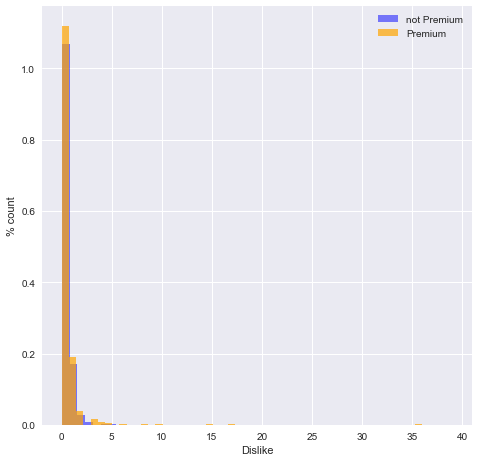

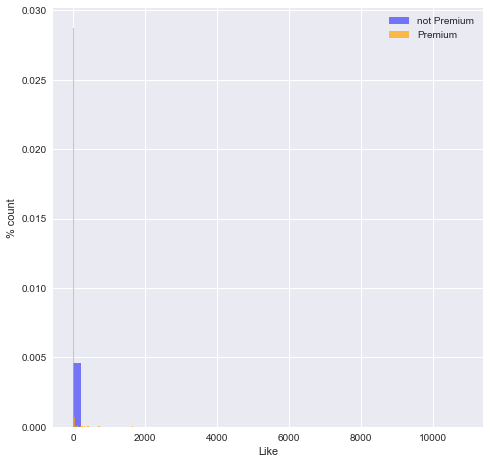

In [21]:
for column in df_premium_num:
    
    plt.hist(df_notpremium_num[column].dropna(), bins=50,
            label='not Premium', alpha=0.5, color='blue', normed=True)
    
    plt.hist(df_premium_num[column].dropna(), bins=50, 
             label='Premium', alpha=0.7, color='orange', normed=True)
  
    plt.xlabel(column)  
    plt.ylabel('% count')
    plt.title('', fontsize=20)
    
    plt.legend()
    plt.show();

In [22]:
for column in df_premium_num:
    
    print(column)
    print('mean not_premium', df_notpremium_num[column].mean())
    print('median not_premium', df_notpremium_num[column].median())
    
    print('mean premium', df_premium_num[column].mean())
    print('median premium', df_premium_num[column].median())
    print('*************************************************************')

StudentId
('mean not_premium', 50018540.36825413)
('median not_premium', 50107109.0)
('mean premium', 49884152.832072616)
('median premium', 50276542.0)
*************************************************************
Qnt_QuestionSnippet
('mean not_premium', 1.7078269324258628)
('median not_premium', 1.0)
('mean premium', 2.1475409836065573)
('median premium', 1.0)
*************************************************************
NumberofSessions
('mean not_premium', 21.531930296292465)
('median not_premium', 11.0)
('mean premium', 75.5642965204236)
('median premium', 48.0)
*************************************************************
Pagantes
('mean not_premium', 0.0)
('median not_premium', 0.0)
('mean premium', 1.0)
('median premium', 1.0)
*************************************************************
Churn
('mean not_premium', 0.0007239257459020631)
('median not_premium', 0.0)
('mean premium', 0.3661119515885023)
('median premium', 0.0)
******************************************************

In [23]:
df['Qnt_fileviews'].sum() #.info()

3005038.0

# Recursos mais utilizados pelas top 5 universidades

In [24]:
# Estacio 
df_estacio = df[df.UniversityName == 'estacio']
print(df_estacio.shape)

df_estacio.drop(['StudentId', 'Pagantes', 'Churn'], axis=1, inplace=True)

df_estacio.head()

(8919, 34)


,City,CourseName,RegisteredDate,SignupSource,State,StudentClient,UniversityName,Qnt_QuestionSnippet,NumberofSessions,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Qnt_fileviews,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
11,vila velha,administracao,2012-10-15 21:35:05.540000,facebook,espirito santo,NaN,estacio,NaN,23,NaN,NaN,4.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,NaN,direito,2012-10-30 17:13:22.230000,facebook,rio de janeiro,NaN,estacio,NaN,4,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,fortaleza,contabilidade / ciencias contabeis,2012-10-30 17:54:28.267000,email,ceara,NaN,estacio,NaN,16,NaN,NaN,10.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
39,rio de janeiro,direito,2012-10-26 23:20:50.787000,facebook,rio de janeiro,NaN,estacio,NaN,1,NaN,NaN,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,14.0
50,cabo frio,engenharia de petroleo e gas,2012-11-01 23:57:16.837000,email,rio de janeiro,NaN,estacio,NaN,37,NaN,NaN,3.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


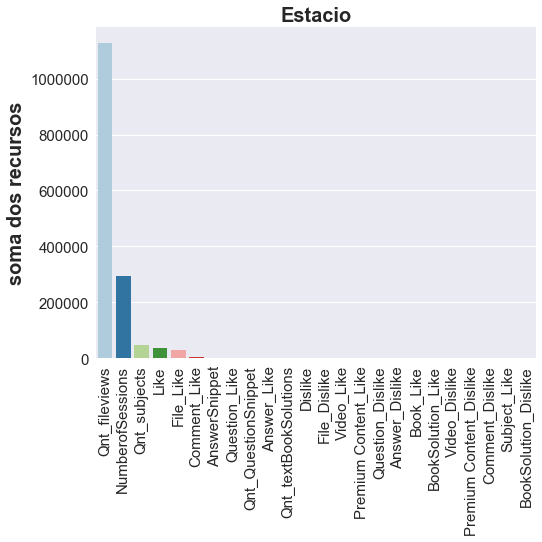

In [25]:
column_estacio = []
total_estacio = []

for column in df_estacio:
    if (df_estacio[column].dtypes != object):
        column_estacio.append(column)
        total_estacio.append(df_estacio[column].sum())
        
df_feat_estacio = pd.DataFrame(total_estacio, column_estacio).reset_index()
df_feat_estacio.columns = ['feature', 'sum']

df_feat_estacio.sort_values(by='sum', ascending=False, inplace=True)
df_feat_estacio

graph_estacio = sns.barplot(x='feature', y='sum', 
                         data=df_feat_estacio, palette='Paired')
    
for tick in graph_estacio.get_xticklabels():
    tick.set_rotation(90)

graph_estacio.xaxis.set_tick_params(labelsize=15)    
graph_estacio.yaxis.set_tick_params(labelsize=15)    

plt.title('Estacio', fontweight='bold', fontsize=20)
plt.xlabel('', fontweight='bold', fontsize=20)
plt.ylabel('soma dos recursos',fontweight='bold', fontsize=20)
plt.tight_layout()
plt.savefig('estacio.png', dpi=100)
    

In [26]:
# unip 
df_unip = df[df.UniversityName == 'unip']
print(df_unip.shape)

df_unip.drop(['StudentId', 'Pagantes', 'Churn'], axis=1, inplace=True)

df_unip.head()

(4392, 34)


,City,CourseName,RegisteredDate,SignupSource,State,StudentClient,UniversityName,Qnt_QuestionSnippet,NumberofSessions,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Qnt_fileviews,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
393,santos,engenharia civil,2013-05-06 02:44:59.790000,email,sao paulo,NaN,unip,NaN,10,NaN,NaN,NaN,19.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
581,NaN,pedagogia,2013-07-11 18:12:32.227000,facebook,NaN,NaN,unip,NaN,54,NaN,NaN,1.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
821,NaN,direito,2013-09-08 12:48:56.847000,facebook,NaN,NaN,unip,NaN,31,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,NaN,arquitetura e urbanismo,2013-09-09 16:46:33.103000,facebook,NaN,NaN,unip,NaN,5,NaN,2.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,nutricao,2013-09-09 17:07:42.433000,email,sao paulo,NaN,unip,NaN,6,NaN,NaN,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


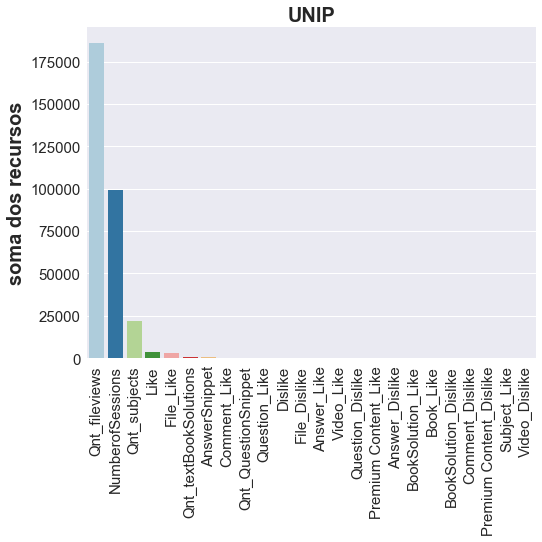

In [27]:
column_unip = []
total_unip = []

for column in df_unip:
    if (df_unip[column].dtypes != object):
        column_unip.append(column)
        total_unip.append(df_unip[column].sum())
        
df_feat_unip = pd.DataFrame(total_unip, column_unip).reset_index()
df_feat_unip.columns = ['feature', 'sum']

df_feat_unip.sort_values(by='sum', ascending=False, inplace=True)
df_feat_unip

graph_unip = sns.barplot(x='feature', y='sum', 
                         data=df_feat_unip, palette='Paired')
    
for tick in graph_unip.get_xticklabels():
    tick.set_rotation(90)

graph_unip.xaxis.set_tick_params(labelsize=15)    
graph_unip.yaxis.set_tick_params(labelsize=15)    

plt.title('UNIP', fontweight='bold', fontsize=20)
plt.xlabel('', fontweight='bold', fontsize=20)
plt.ylabel('soma dos recursos',fontweight='bold', fontsize=20)
plt.tight_layout()
plt.savefig('unip.png', dpi=100)
    

In [28]:
# unopar 
df_unopar = df[df.UniversityName == 'unopar']
print(df_unopar.shape)

df_unopar.drop(['StudentId', 'Pagantes', 'Churn'], axis=1, inplace=True)

df_unopar.head()

(1784, 34)


,City,CourseName,RegisteredDate,SignupSource,State,StudentClient,UniversityName,Qnt_QuestionSnippet,NumberofSessions,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Qnt_fileviews,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
345,niteroi,licenciatura em quimica,2013-04-12 13:01:10.327000,facebook,rio de janeiro,NaN,unopar,NaN,21,NaN,NaN,5.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
558,NaN,direito,2013-07-11 18:10:35.360000,facebook,NaN,NaN,unopar,NaN,25,NaN,NaN,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,NaN,contabilidade / ciencias contabeis,2013-09-03 19:50:17.497000,email,bahia,NaN,unopar,1.0,93,9.0,NaN,6.0,188.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0
747,NaN,direito,2013-09-04 23:49:40.163000,email,parana,NaN,unopar,NaN,9,NaN,NaN,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
974,NaN,contabilidade / ciencias contabeis,2013-09-12 10:17:04.907000,facebook,rio grande do sul,NaN,unopar,NaN,35,NaN,NaN,10.0,69.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


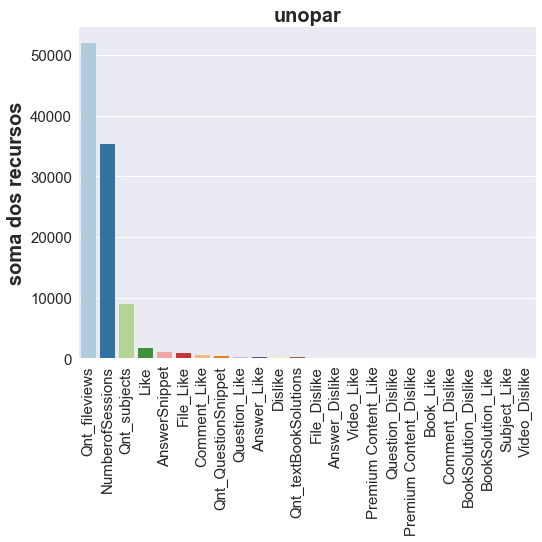

In [29]:
column_unopar = []
total_unopar = []

for column in df_unopar:
    if (df_unopar[column].dtypes != object):
        column_unopar.append(column)
        total_unopar.append(df_unopar[column].sum())
        
df_feat_unopar = pd.DataFrame(total_unopar, column_unopar).reset_index()
df_feat_unopar.columns = ['feature', 'sum']

df_feat_unopar.sort_values(by='sum', ascending=False, inplace=True)
df_feat_unopar

graph_unopar = sns.barplot(x='feature', y='sum', 
                         data=df_feat_unopar, palette='Paired')
    
for tick in graph_unopar.get_xticklabels():
    tick.set_rotation(90)

graph_unopar.xaxis.set_tick_params(labelsize=15)    
graph_unopar.yaxis.set_tick_params(labelsize=15)    

plt.title('unopar', fontweight='bold', fontsize=20)
plt.xlabel('', fontweight='bold', fontsize=20)
plt.ylabel('soma dos recursos',fontweight='bold', fontsize=20)
plt.tight_layout()
plt.savefig('unopar.png', dpi=100)
    

In [30]:
# uninter 
df_uninter = df[df.UniversityName == 'uninter']
print(df_uninter.shape)

df_uninter.drop(['StudentId', 'Pagantes', 'Churn'], axis=1, inplace=True)

df_uninter.head()

(1780, 34)


,City,CourseName,RegisteredDate,SignupSource,State,StudentClient,UniversityName,Qnt_QuestionSnippet,NumberofSessions,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Qnt_fileviews,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
499,goiania,pedagogia,2013-07-11 18:06:05.093000,facebook,goias,NaN,uninter,NaN,30,NaN,2.0,11.0,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
661,rio de janeiro,letras e linguas - portugues,2013-08-23 19:06:15.950000,email,rio de janeiro,NaN,uninter,NaN,44,NaN,NaN,2.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
1074,cambui,licenciatura em historia,2013-09-17 12:41:19.543000,facebook,minas gerais,NaN,uninter,NaN,28,NaN,NaN,4.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1187,porto alegre,pedagogia,2013-09-23 22:03:52.197000,facebook,rio grande do sul,NaN,uninter,NaN,193,NaN,NaN,NaN,539.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1296,NaN,matematica,2013-09-29 20:23:39.710000,facebook,parana,NaN,uninter,NaN,31,2.0,NaN,6.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


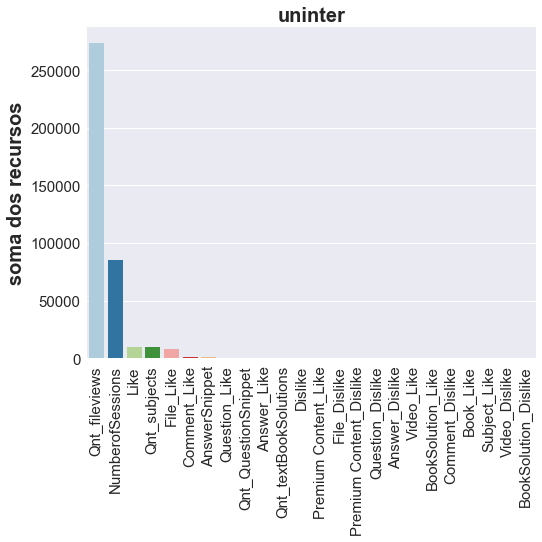

In [31]:
column_uninter = []
total_uninter = []

for column in df_uninter:
    if (df_uninter[column].dtypes != object):
        column_uninter.append(column)
        total_uninter.append(df_uninter[column].sum())
        
df_feat_uninter = pd.DataFrame(total_uninter, column_uninter).reset_index()
df_feat_uninter.columns = ['feature', 'sum']

df_feat_uninter.sort_values(by='sum', ascending=False, inplace=True)
df_feat_uninter

graph_uninter = sns.barplot(x='feature', y='sum', 
                         data=df_feat_uninter, palette='Paired')
    
for tick in graph_uninter.get_xticklabels():
    tick.set_rotation(90)

graph_uninter.xaxis.set_tick_params(labelsize=15)    
graph_uninter.yaxis.set_tick_params(labelsize=15)    

plt.title('uninter', fontweight='bold', fontsize=20)
plt.xlabel('', fontweight='bold', fontsize=20)
plt.ylabel('soma dos recursos',fontweight='bold', fontsize=20)
plt.tight_layout()
plt.savefig('uninter.png', dpi=100)
    